# Crop Yield Prediction
### Md. Rubel Rana 1712661642
### Navid Al - Musabbir 1721853042

In [1]:
import graphviz
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats
import autosklearn.regression
import autogluon.core as ag
from tpot import TPOTRegressor

from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

import autosklearn
import sklearn.metrics

from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

from autosklearn.classification import AutoSklearnClassifier


from supervised.automl import AutoML
from supervised.preprocessing.eda import EDA

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import accuracy_score


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
# Dataset
dataset = 'dataset/Boro/boro.csv'

In [3]:
# Load dataset into dataframe
data = pd.read_csv(dataset)

## Data Exploration

In [4]:
data.shape

(751, 13)

In [5]:
data.columns

Index(['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT', 'Productions', 'PPH'],
      dtype='object')

In [6]:
data.head()

District    Area  Year   Max_Temp   Min_Temp    Rainfall   Humidity  \
0         2   36600  1970  41.700000  24.800000  206.333333  73.000000   
1         3  167445  1970  34.333333  24.933333  170.333333  81.666667   
2         4  187455  1970  35.233333  25.233333  150.000000  92.000000   
3         5  179600  1970  36.166667  25.333333  171.000000  77.666667   
4         6   13350  1970  36.866667  24.366667  134.333333  67.000000   

       Wind     Cloud  Sunshine  ALT  Productions       PPH  
0  1.466667  4.166667  7.133333   20        33825  0.924180  
1  3.700000  5.200000  6.633333    6       201390  1.202723  
2  1.666667  2.966667  6.435354   10       184035  0.981756  
3  2.266667  4.700000  7.766667    9       167805  0.934326  
4  0.900000  3.166667  6.500000   37         9220  0.690637

In [7]:
data.tail()

District    Area  Year   Max_Temp   Min_Temp    Rainfall   Humidity  \
746        14  180726  2013  39.700000  24.633333  139.000000  75.333333   
747        15   18759  2013  36.333333  23.933333  266.000000  77.333333   
748        16  331530  2013  36.500000  23.833333  275.000000  77.666667   
749        17  170795  2013  37.400000  23.466667  639.000000  78.000000   
750        18  410639  2013  37.166667  24.433333  188.666667  76.666667   

         Wind     Cloud  Sunshine  ALT  Productions       PPH  
746  2.366667  4.233333  5.933333   20       315647  1.746550  
747  2.000000  4.666667  5.833333   63        33762  1.799776  
748  2.366667  5.366667  5.600000   34       630965  1.903191  
749  3.366667  6.066667  4.933333   35       220277  1.289716  
750  2.400000  4.600000  5.000000   10       752333  1.832103

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     751 non-null    int64  
 1   Area         751 non-null    int64  
 2   Year         751 non-null    int64  
 3   Max_Temp     751 non-null    float64
 4   Min_Temp     751 non-null    float64
 5   Rainfall     751 non-null    float64
 6   Humidity     751 non-null    float64
 7   Wind         751 non-null    float64
 8   Cloud        751 non-null    float64
 9   Sunshine     751 non-null    float64
 10  ALT          751 non-null    int64  
 11  Productions  751 non-null    int64  
 12  PPH          751 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 76.4 KB


In [9]:
data.describe()

District           Area         Year    Max_Temp    Min_Temp  \
count  751.000000     751.000000   751.000000  751.000000  751.000000   
mean     9.326232  263286.352863  1992.346205   36.510209   24.265868   
std      5.029920  218153.225677    12.440471    1.750047    0.974240   
min      1.000000    1580.000000  1970.000000   31.800000   14.833333   
25%      5.000000   89982.500000  1982.000000   35.366667   23.666667   
50%      9.000000  206735.000000  1993.000000   36.333333   24.333333   
75%     14.000000  401539.500000  2003.000000   37.483333   24.933333   
max     18.000000  922335.000000  2013.000000   43.500000   26.466667   

         Rainfall    Humidity        Wind       Cloud    Sunshine         ALT  \
count  751.000000  751.000000  751.000000  751.000000  751.000000  751.000000   
mean   264.338660   78.855304    2.094496    4.535508    6.352796   16.948069   
std    126.688285    4.294570    1.097797    0.664768    0.748417   14.657830   
min     21.666667   58.000000    0.200000    2.500000    3.166667    3.000000   
25%    178.333333   76.666667    1.366667    4.166667    5.916667    6.000000   
50%    235.333333   79.333333    1.800000    4.533333    6.433333   10.000000   
75%    319.500000   82.000000    2.500000    4.950000    6.862222   20.000000   
max    893.000000   92.000000    8.133333    6.633333    9.033333   63.000000   

        Productions         PPH  
count  7.510000e+02  751.000000  
mean   3.308535e+05    1.219176  
std    2.869446e+05    0.445474  
min    8.740000e+02    0.392036  
25%    9.662850e+04    1.003726  
50%    2.578560e+05    1.189978  
75%    5.179200e+05    1.346337  
max    1.290234e+06    9.812796

## Data Preprocessing

#### a. Removing 0's and NaN values

In [10]:
# Checking 0 values
(data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [11]:
# Replace 0's with NaN
data.replace(0, np.nan, inplace=True)

In [12]:
data.isnull().sum().sum()

0

In [13]:
# Drop all NaN values
data = data.dropna()
data = data.reset_index(drop=True)

In [14]:
data.isnull().values.any()

False

In [15]:
# Be ensure about 0's and NaN values
(data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [16]:
data['Area'] = data.Area.astype(int)
data['Productions'] = data.Area.astype(int)
data['PPH'] = pd.to_numeric(data['PPH'])

In [17]:
data.shape

(751, 13)

In [18]:
data.head()

District    Area  Year   Max_Temp   Min_Temp    Rainfall   Humidity  \
0         2   36600  1970  41.700000  24.800000  206.333333  73.000000   
1         3  167445  1970  34.333333  24.933333  170.333333  81.666667   
2         4  187455  1970  35.233333  25.233333  150.000000  92.000000   
3         5  179600  1970  36.166667  25.333333  171.000000  77.666667   
4         6   13350  1970  36.866667  24.366667  134.333333  67.000000   

       Wind     Cloud  Sunshine  ALT  Productions       PPH  
0  1.466667  4.166667  7.133333   20        36600  0.924180  
1  3.700000  5.200000  6.633333    6       167445  1.202723  
2  1.666667  2.966667  6.435354   10       187455  0.981756  
3  2.266667  4.700000  7.766667    9       179600  0.934326  
4  0.900000  3.166667  6.500000   37        13350  0.690637

In [19]:
data.tail()

District    Area  Year   Max_Temp   Min_Temp    Rainfall   Humidity  \
746        14  180726  2013  39.700000  24.633333  139.000000  75.333333   
747        15   18759  2013  36.333333  23.933333  266.000000  77.333333   
748        16  331530  2013  36.500000  23.833333  275.000000  77.666667   
749        17  170795  2013  37.400000  23.466667  639.000000  78.000000   
750        18  410639  2013  37.166667  24.433333  188.666667  76.666667   

         Wind     Cloud  Sunshine  ALT  Productions       PPH  
746  2.366667  4.233333  5.933333   20       180726  1.746550  
747  2.000000  4.666667  5.833333   63        18759  1.799776  
748  2.366667  5.366667  5.600000   34       331530  1.903191  
749  3.366667  6.066667  4.933333   35       170795  1.289716  
750  2.400000  4.600000  5.000000   10       410639  1.832103

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     751 non-null    int64  
 1   Area         751 non-null    int64  
 2   Year         751 non-null    int64  
 3   Max_Temp     751 non-null    float64
 4   Min_Temp     751 non-null    float64
 5   Rainfall     751 non-null    float64
 6   Humidity     751 non-null    float64
 7   Wind         751 non-null    float64
 8   Cloud        751 non-null    float64
 9   Sunshine     751 non-null    float64
 10  ALT          751 non-null    int64  
 11  Productions  751 non-null    int64  
 12  PPH          751 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 76.4 KB


#### b. Removing Outliers 

In [21]:
z = np.abs(stats.zscore(data))

In [22]:
np.where(z > 4)

(array([ 20,  40, 142, 144, 299, 315, 353, 353, 669, 687, 696, 705, 718,
        723, 736, 740]),
 array([ 4,  4,  6,  6,  5, 12,  5,  9,  7,  7,  5,  7,  7,  7,  7,  7]))

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [24]:
(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

District   Area   Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0       False  False  False      True     False     False     False  False   
1       False  False  False     False     False     False     False  False   
2       False  False  False     False     False     False      True  False   
3       False  False  False     False     False     False     False  False   
4       False  False  False     False     False     False      True  False   
..        ...    ...    ...       ...       ...       ...       ...    ...   
746     False  False  False     False     False     False     False  False   
747     False  False  False     False     False     False     False  False   
748     False  False  False     False     False     False     False  False   
749     False  False  False     False     False      True     False  False   
750     False  False  False     False     False     False     False  False   

     Cloud  Sunshine    ALT  Productions    PPH  
0    False     False  False        False  False  
1    False     False  False        False  False  
2     True     False  False        False  False  
3    False     False  False        False  False  
4    False     False  False        False  False  
..     ...       ...    ...          ...    ...  
746  False     False  False        False  False  
747  False     False   True        False  False  
748  False     False  False        False   True  
749  False     False  False        False  False  
750  False     False  False        False  False  

[751 rows x 13 columns]

In [25]:
data.shape

(751, 13)

In [26]:
data = data[(z < 4).all(axis=1)]

In [27]:
data.shape

(736, 13)

## Spliting Data

In [28]:
X = data[['District', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall', 'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = data['PPH']

#### a. Train data & Test data

In [29]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.3)

#### a. Train data & Validation data

In [30]:
X_train, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.3)

## 1. Performing Automating EDA

Considering 7 the most frequent values
Considering 7 the most frequent values
Considering 7 the most frequent values


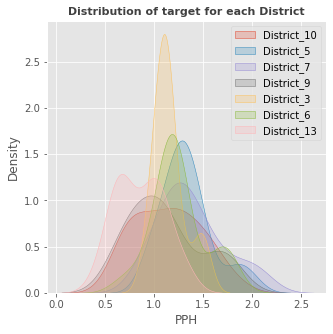

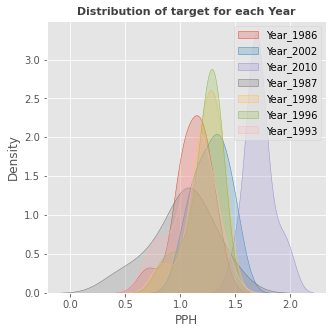

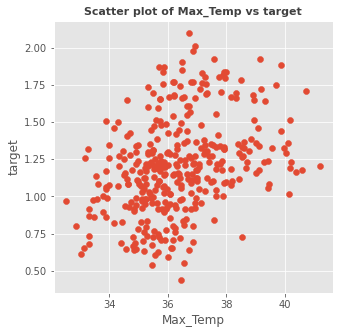

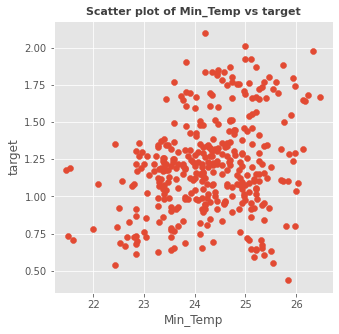

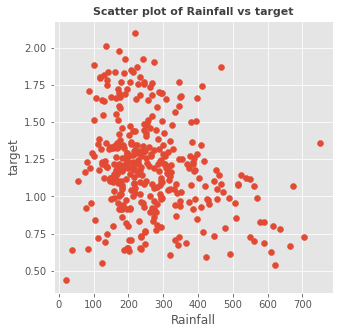

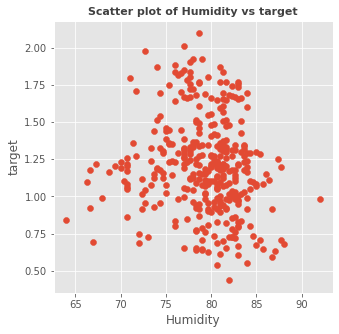

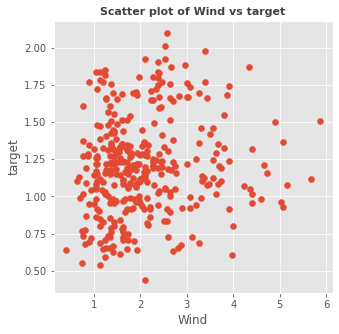

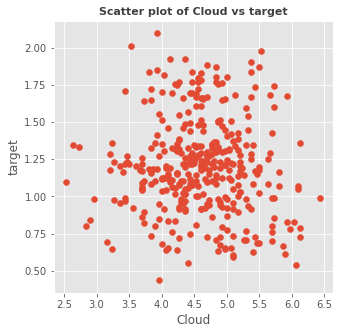

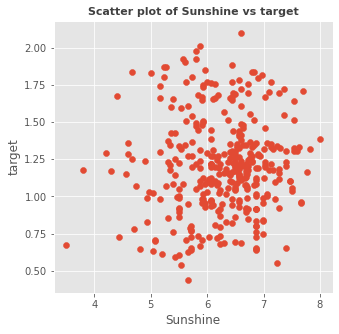

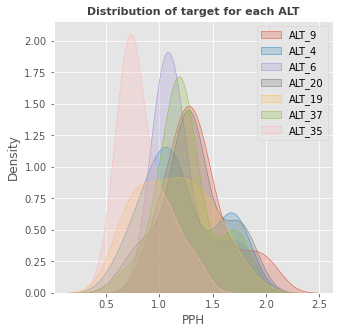

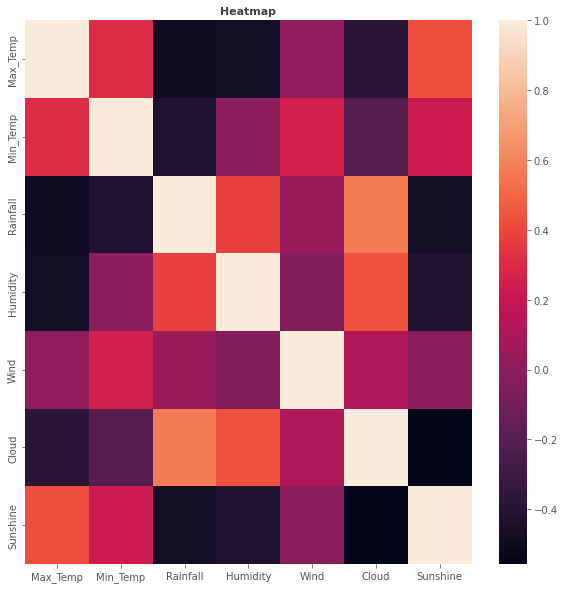

In [31]:
EDA.extensive_eda(X_train,y_valid,save_path="content/mljar-supervised/boro")

## Creating AutoML Models

In [32]:
automl = AutoML(mode='Compete',
                total_time_limit=10,
                results_path="AutoML_classifier/Boro")

In [33]:
automl.fit(X_train, y_valid)

This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [34]:
predictions = automl.predict(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


#### a. RMSE

In [35]:
metrics.mean_squared_error(y_test, predictions)

0.01037301547579271

#### b. MAE

In [36]:
metrics.mean_absolute_error(y_test, predictions)

0.07333162069819141

#### c. R2

In [37]:
metrics.r2_score(y_test, predictions)

0.8840615468985963

In [38]:
y_pred = automl.predict(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


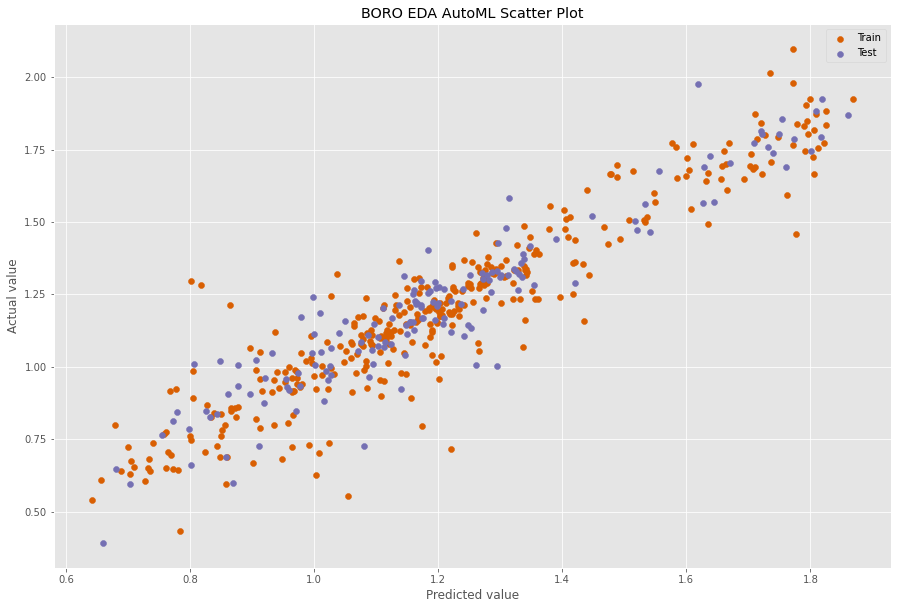

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('BORO EDA AutoML Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/boro_eda_automl_scatter.png")
plt.show()

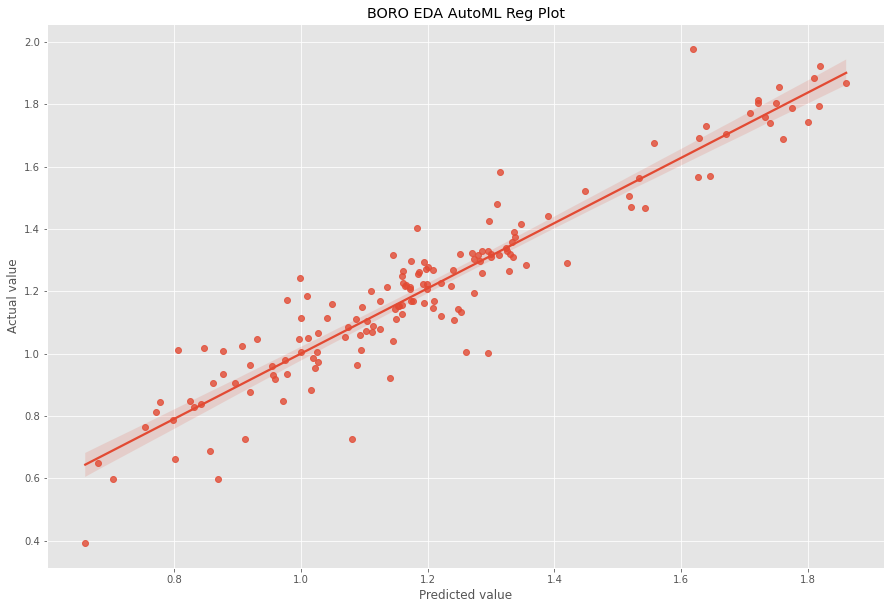

In [40]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('BORO EDA AutoML Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/boro_eda_autosk_reg.png")

## 2. AutoSklearn Regression

In [41]:
autosk = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='autosklearn_regression/boro',
    resampling_strategy='holdout',
    resampling_strategy_arguments={'folds': 5},
)

In [42]:
autosk.fit(X_train, y_valid, dataset_name='data')

AutoSklearnRegressor(per_run_time_limit=30,
                     resampling_strategy_arguments={'folds': 5},
                     time_left_for_this_task=120,
                     tmp_folder='autosklearn_regression/boro')

In [43]:
autosk.leaderboard()

rank  ensemble_weight               type      cost   duration
model_id                                                               
8            1             0.44  gradient_boosting  0.226510   1.459559
7            2             0.20  gradient_boosting  0.227947   1.550822
9            3             0.20      random_forest  0.258867  10.345518
3            4             0.16   gaussian_process  0.311820  16.516340

In [44]:
print(autosk.show_models())

[(0.440000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'gradient_boosting', 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'False', 'feature_preprocessor:polynomial:interaction_only': 'True', 'regressor:gradient_boosting:early_stop': 'valid', 'regressor:gradient_boosting:l2_regularization': 0.0018018055158809108, 'regressor:gradient_boosting:learning_rate': 0.05048450688348591, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gradient_boosting:max_depth': 'None', 'regressor:gradient_boosting:max_l

In [45]:
predictions = autosk.predict(X_test)

#### a. RMSE

In [46]:
metrics.mean_squared_error(y_test, predictions)

0.016034513395578705

#### b. MAE

In [47]:
metrics.mean_absolute_error(y_test, predictions)

0.09148046204330862

#### c. R2

In [48]:
metrics.r2_score(y_test, predictions)

0.8207833890101216

In [49]:
y_pred = autosk.predict(X_train)

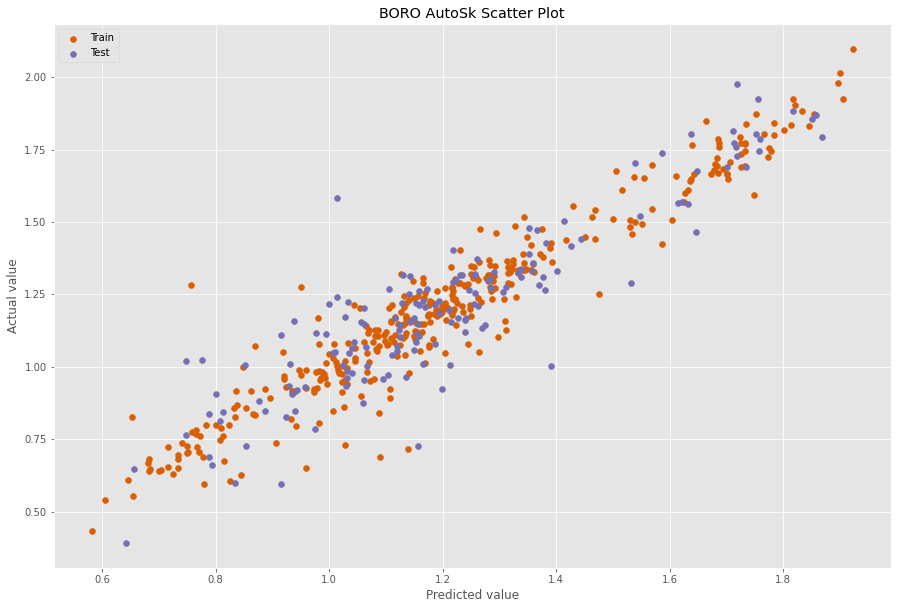

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('BORO AutoSk Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/boro_autosk_scatter.png")
plt.show()

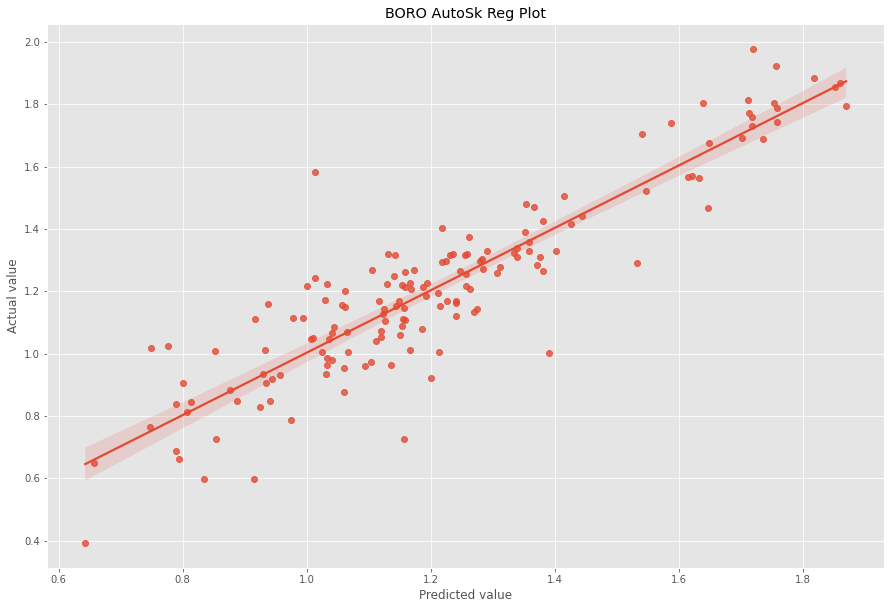

In [51]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('BORO AutoSk Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/boro_autosk_reg.png")

## 3. AutoGluon

In [52]:
train_data = TabularDataset('dataset/Boro/train_data.csv')

In [53]:
test_data = TabularDataset('dataset/Boro/test_data.csv')

In [54]:
# Checking 0 values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [55]:
# Replace 0's with NaN
train_data.replace(0, np.nan, inplace=True)
test_data.replace(0, np.nan, inplace=True)

In [56]:
train_data.isnull().sum().sum()
test_data.isnull().sum().sum()

0

In [57]:
# Drop all NaN values
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)
test_data = test_data.dropna()
test_data = test_data.reset_index(drop=True)

In [58]:
train_data.isnull().values.any()
test_data.isnull().values.any()

False

In [59]:
# Be ensure about 0's and NaN values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [60]:
train_data['Area'] = train_data.Area.astype(int)
train_data['Productions'] = train_data.Area.astype(int)
train_data['PPH'] = pd.to_numeric(train_data['PPH'])
test_data['Area'] = test_data.Area.astype(int)
test_data['Productions'] = test_data.Area.astype(int)
test_data['PPH'] = pd.to_numeric(test_data['PPH'])

In [61]:
label = 'PPH'

In [62]:
data[label].describe()

count    736.000000
mean       1.204939
std        0.312548
min        0.392036
25%        1.004300
50%        1.188996
75%        1.338620
max        2.461086
Name: PPH, dtype: float64

In [63]:
save_path = 'autogluon/boro'

In [64]:
hyperparameters = {
    'NN': {'num_epochs': 10, 'activation': 'relu', 'dropout_prob': ag.Real(0.0, 0.5)},
    'GBM': {'num_boost_round': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)},
    'XGB': {'n_estimators': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)}
}

In [65]:
predictor = TabularPredictor(label=label, path=save_path).fit(
    train_data, hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto', time_limit=60
)

[WARNING] [2021-09-19 00:05:43,103:autogluon.core.utils.utils] Warning: path already exists! This predictor may overwrite an existing predictor! path="autogluon/boro"
[WARNING] [2021-09-19 00:05:43,104:root] Warning: hyperparameter tuning is currently experimental and may cause the process to hang.


In [66]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.098664       0.078846  29.776010                0.000329           0.146459            2       True         12
1            XGBoost/T0  -0.099335       0.045367  16.072687                0.045367          16.072687            1       True          2
2           LightGBM/T0  -0.123726       0.033149  13.556864                0.033149          13.556864            1       True          1
3     NeuralNetMXNet/T8  -0.444026       0.005028   0.419145                0.005028           0.419145            1       True         11
4     NeuralNetMXNet/T2  -1.593557       0.006675   0.548854                0.006675           0.548854            1       True          5
5     NeuralNetMXNet/T3  -1.672744       0.005831   0.456112                0.005831           0.456112 

AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"


{'model_types': {'LightGBM/T0': 'LGBModel',
  'XGBoost/T0': 'XGBoostModel',
  'NeuralNetMXNet/T0': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T1': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T2': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T3': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T4': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T5': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T6': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T7': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T8': 'TabularNeuralNetModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T0': -0.12372648142461212,
  'XGBoost/T0': -0.09933471596813949,
  'NeuralNetMXNet/T0': -3.61340069770813,
  'NeuralNetMXNet/T1': -2.3299331665039062,
  'NeuralNetMXNet/T2': -1.5935571193695068,
  'NeuralNetMXNet/T3': -1.672743797302246,
  'NeuralNetMXNet/T4': -3.9935407638549805,
  'NeuralNetMXNet/T5': -2.7179224491119385,
  'NeuralNetMXNet/T6': -2.7990682125091553,
  'NeuralNetMXNet/T7': -2.647926092147

In [67]:
perf = predictor.evaluate(test_data)

In [68]:
y_pred = predictor.predict_proba(test_data)

In [69]:
perf = predictor.evaluate_predictions(y_true=test_data[label], y_pred=y_pred, auxiliary_metrics=True)

In [70]:
perf

{'root_mean_squared_error': -0.5164241129806126,
 'mean_squared_error': -0.2666938644678125,
 'mean_absolute_error': -0.38842486709039575,
 'r2': -2.3865502974179313,
 'pearsonr': 0.2614910945455429,
 'median_absolute_error': -0.39615530299688717}

## 4. Hyperopt

In [71]:
n_iter=10

In [72]:
num_folds=2

In [73]:
kf = KFold(n_splits=num_folds, random_state=None)

In [74]:
model = LGBMRegressor(random_state=42)

#### a. RMSE

In [75]:
abs(cross_val_score(model, X, y, scoring='neg_mean_squared_error')).mean()

0.04932106855942986

#### b. MAE

In [76]:
abs(cross_val_score(model, X, y, scoring='neg_mean_absolute_error')).mean()

0.16944484636242577

#### c. R2

In [77]:
abs(cross_val_score(model, X, y, scoring='r2')).mean()

0.5153405645871028

## 5. TPOT

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [79]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

In [80]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.02507640729626771

Generation 2 - Current best internal CV score: -0.022747403968930706

Generation 3 - Current best internal CV score: -0.022747403968930706

Generation 4 - Current best internal CV score: -0.021108071977640495

Generation 5 - Current best internal CV score: -0.0208800764371955

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=3, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [81]:
predictions = tpot.predict(X_test)

#### b. RMSE

In [82]:
metrics.mean_squared_error(y_test, predictions)

0.014394673400013411

#### b. MAE

In [83]:
metrics.mean_absolute_error(y_test, predictions)

0.09124394322314514

#### c. R2

In [84]:
metrics.r2_score(y_test, predictions)

0.8365713181318329

In [85]:
y_pred = tpot.predict(X_train)

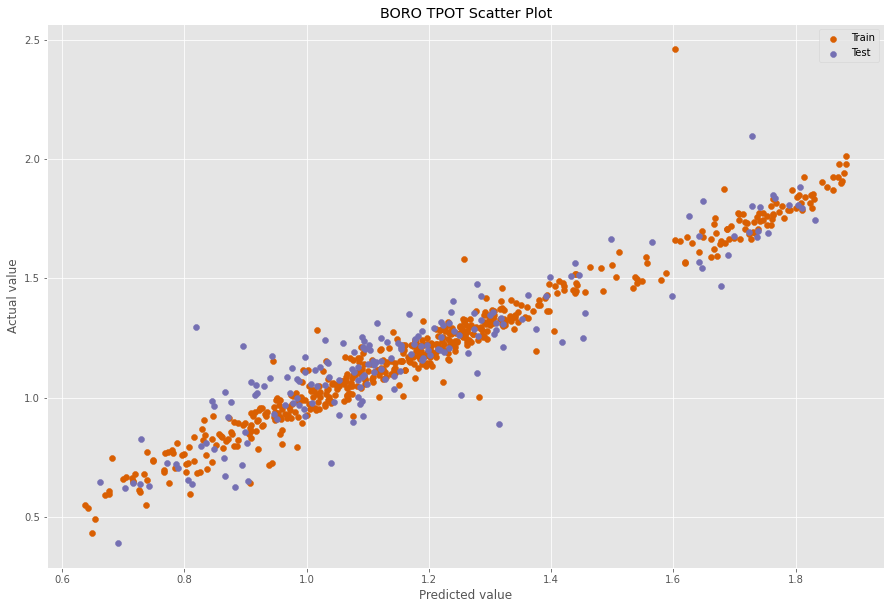

In [86]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_train, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('BORO TPOT Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/boro_tpot_scatter.png")
plt.show()

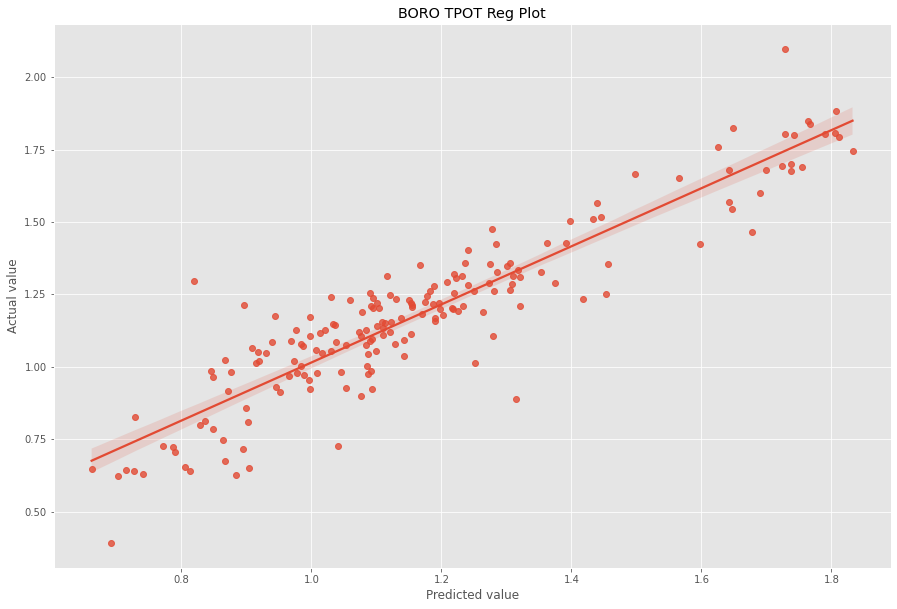

In [87]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('BORO TPOT Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/boro_tpot_reg.png")

## 6. EvalML => AutoMLSearch

In [88]:
import evalml
from evalml import AutoMLSearch

In [89]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='regression', test_size=0.3, random_seed=0)

In [90]:
automl = AutoMLSearch(X_train = X_train, y_train=y_train, problem_type = "regression",max_batches=1,optimize_thresholds=True)
automl.search()

Parameters for components {'Baseline Classifier'} will not be used to instantiate the pipeline since they don't appear in the pipeline


In [91]:
automl.rankings

id                                      pipeline_name  search_order  \
0   5                 Random Forest Regressor w/ Imputer             5   
1   3                       XGBoost Regressor w/ Imputer             3   
2   2                   Extra Trees Regressor w/ Imputer             2   
3   7                      LightGBM Regressor w/ Imputer             7   
4   6                 Decision Tree Regressor w/ Imputer             6   
5   1  Elastic Net Regressor w/ Imputer + Standard Sc...             1   
6   4                      CatBoost Regressor w/ Imputer             4   
7   0                  Mean Baseline Regression Pipeline             0   

   mean_cv_score  standard_deviation_cv_score  validation_score  \
0       0.765320                     0.065368          0.793767   
1       0.758474                     0.040961          0.758483   
2       0.740864                     0.056691          0.778082   
3       0.713266                     0.048715          0.732167   
4       0.627055                     0.073144          0.711259   
5       0.590130                     0.036291          0.611983   
6       0.219061                     0.011324          0.225972   
7      -0.009253                     0.007947         -0.013858   

   percent_better_than_baseline  high_variance_cv  \
0                   8370.891655             False   
1                   8296.910151             False   
2                   8106.593229             False   
3                   7808.336733             False   
4                   6876.645433             False   
5                   6477.597148             False   
6                   2467.413983             False   
7                      0.000000             False   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3  {'Imputer': {'categorical_impute_strategy': 'm...  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6  {'Imputer': {'categorical_impute_strategy': 'm...  
7       {'Baseline Regressor': {'strategy': 'mean'}}

In [92]:
best_pipeline = automl.best_pipeline
best_pipeline

pipeline = RegressionPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'Random Forest Regressor': ['Random Forest Regressor', 'Imputer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Random Forest Regressor':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}, random_seed=0)

In [93]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**************************************
* Random Forest Regressor w/ Imputer *
**************************************

Problem Type: regression
Model Family: Random Forest

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Random Forest Regressor
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 0.6 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.794        0.794     0.635     0.090 0.022 0.110                    0.148        343          172
1           0.812        0.813     0.405     0.080 0.017 0.103                    0.131        343          172
2           0.691        0.691     1.264     0.081 0.031 0.118                    0.177        344         

In [94]:
automl.describe_pipeline(1)


******************************************************
* Elastic Net Regressor w/ Imputer + Standard Scaler *
******************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Elastic Net Regressor
	 * alpha : 0.0001
	 * l1_ratio : 0.15
	 * max_iter : 1000
	 * normalize : False

Training
Training for regression problems.
Total training time (including CV): 0.3 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.612        0.615     0.679     0.132 0.041 0.161                    0.203        343          172
1           0.610        0.612     0.767     0.128 0.036 0.150                    0.189        343          172
2           0.548        

In [95]:
automl.results

{'pipeline_results': {0: {'id': 0,
   'pipeline_name': 'Mean Baseline Regression Pipeline',
   'pipeline_class': evalml.pipelines.regression_pipeline.RegressionPipeline,
   'pipeline_summary': 'Baseline Regressor',
   'parameters': {'Baseline Regressor': {'strategy': 'mean'}},
   'mean_cv_score': -0.009253172410156107,
   'standard_deviation_cv_score': 0.007946558506328692,
   'high_variance_cv': False,
   'training_time': 0.04642152786254883,
   'cv_data': [{'all_objective_scores': OrderedDict([('R2',
                   -0.013858186355417468),
                  ('ExpVariance', 0.0),
                  ('MaxError', 0.7329327510233237),
                  ('MedianAE', 0.15525061099999993),
                  ('MSE', 0.10747236552915979),
                  ('MAE', 0.24847468154678282),
                  ('Root Mean Squared Error', 0.3278297813334838),
                  ('# Training', 343),
                  ('# Validation', 172)]),
     'mean_cv_score': -0.013858186355417468,
     'binary_c

In [96]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

## Graphical Representation

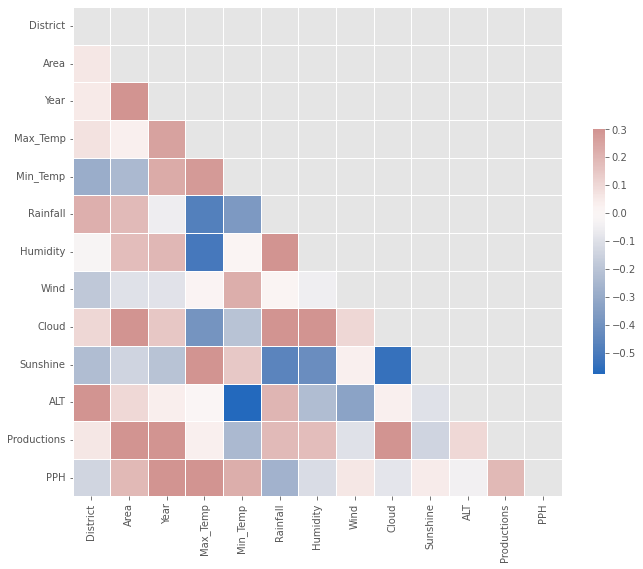

In [97]:
correlation_data=data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<Figure size 720x720 with 0 Axes>

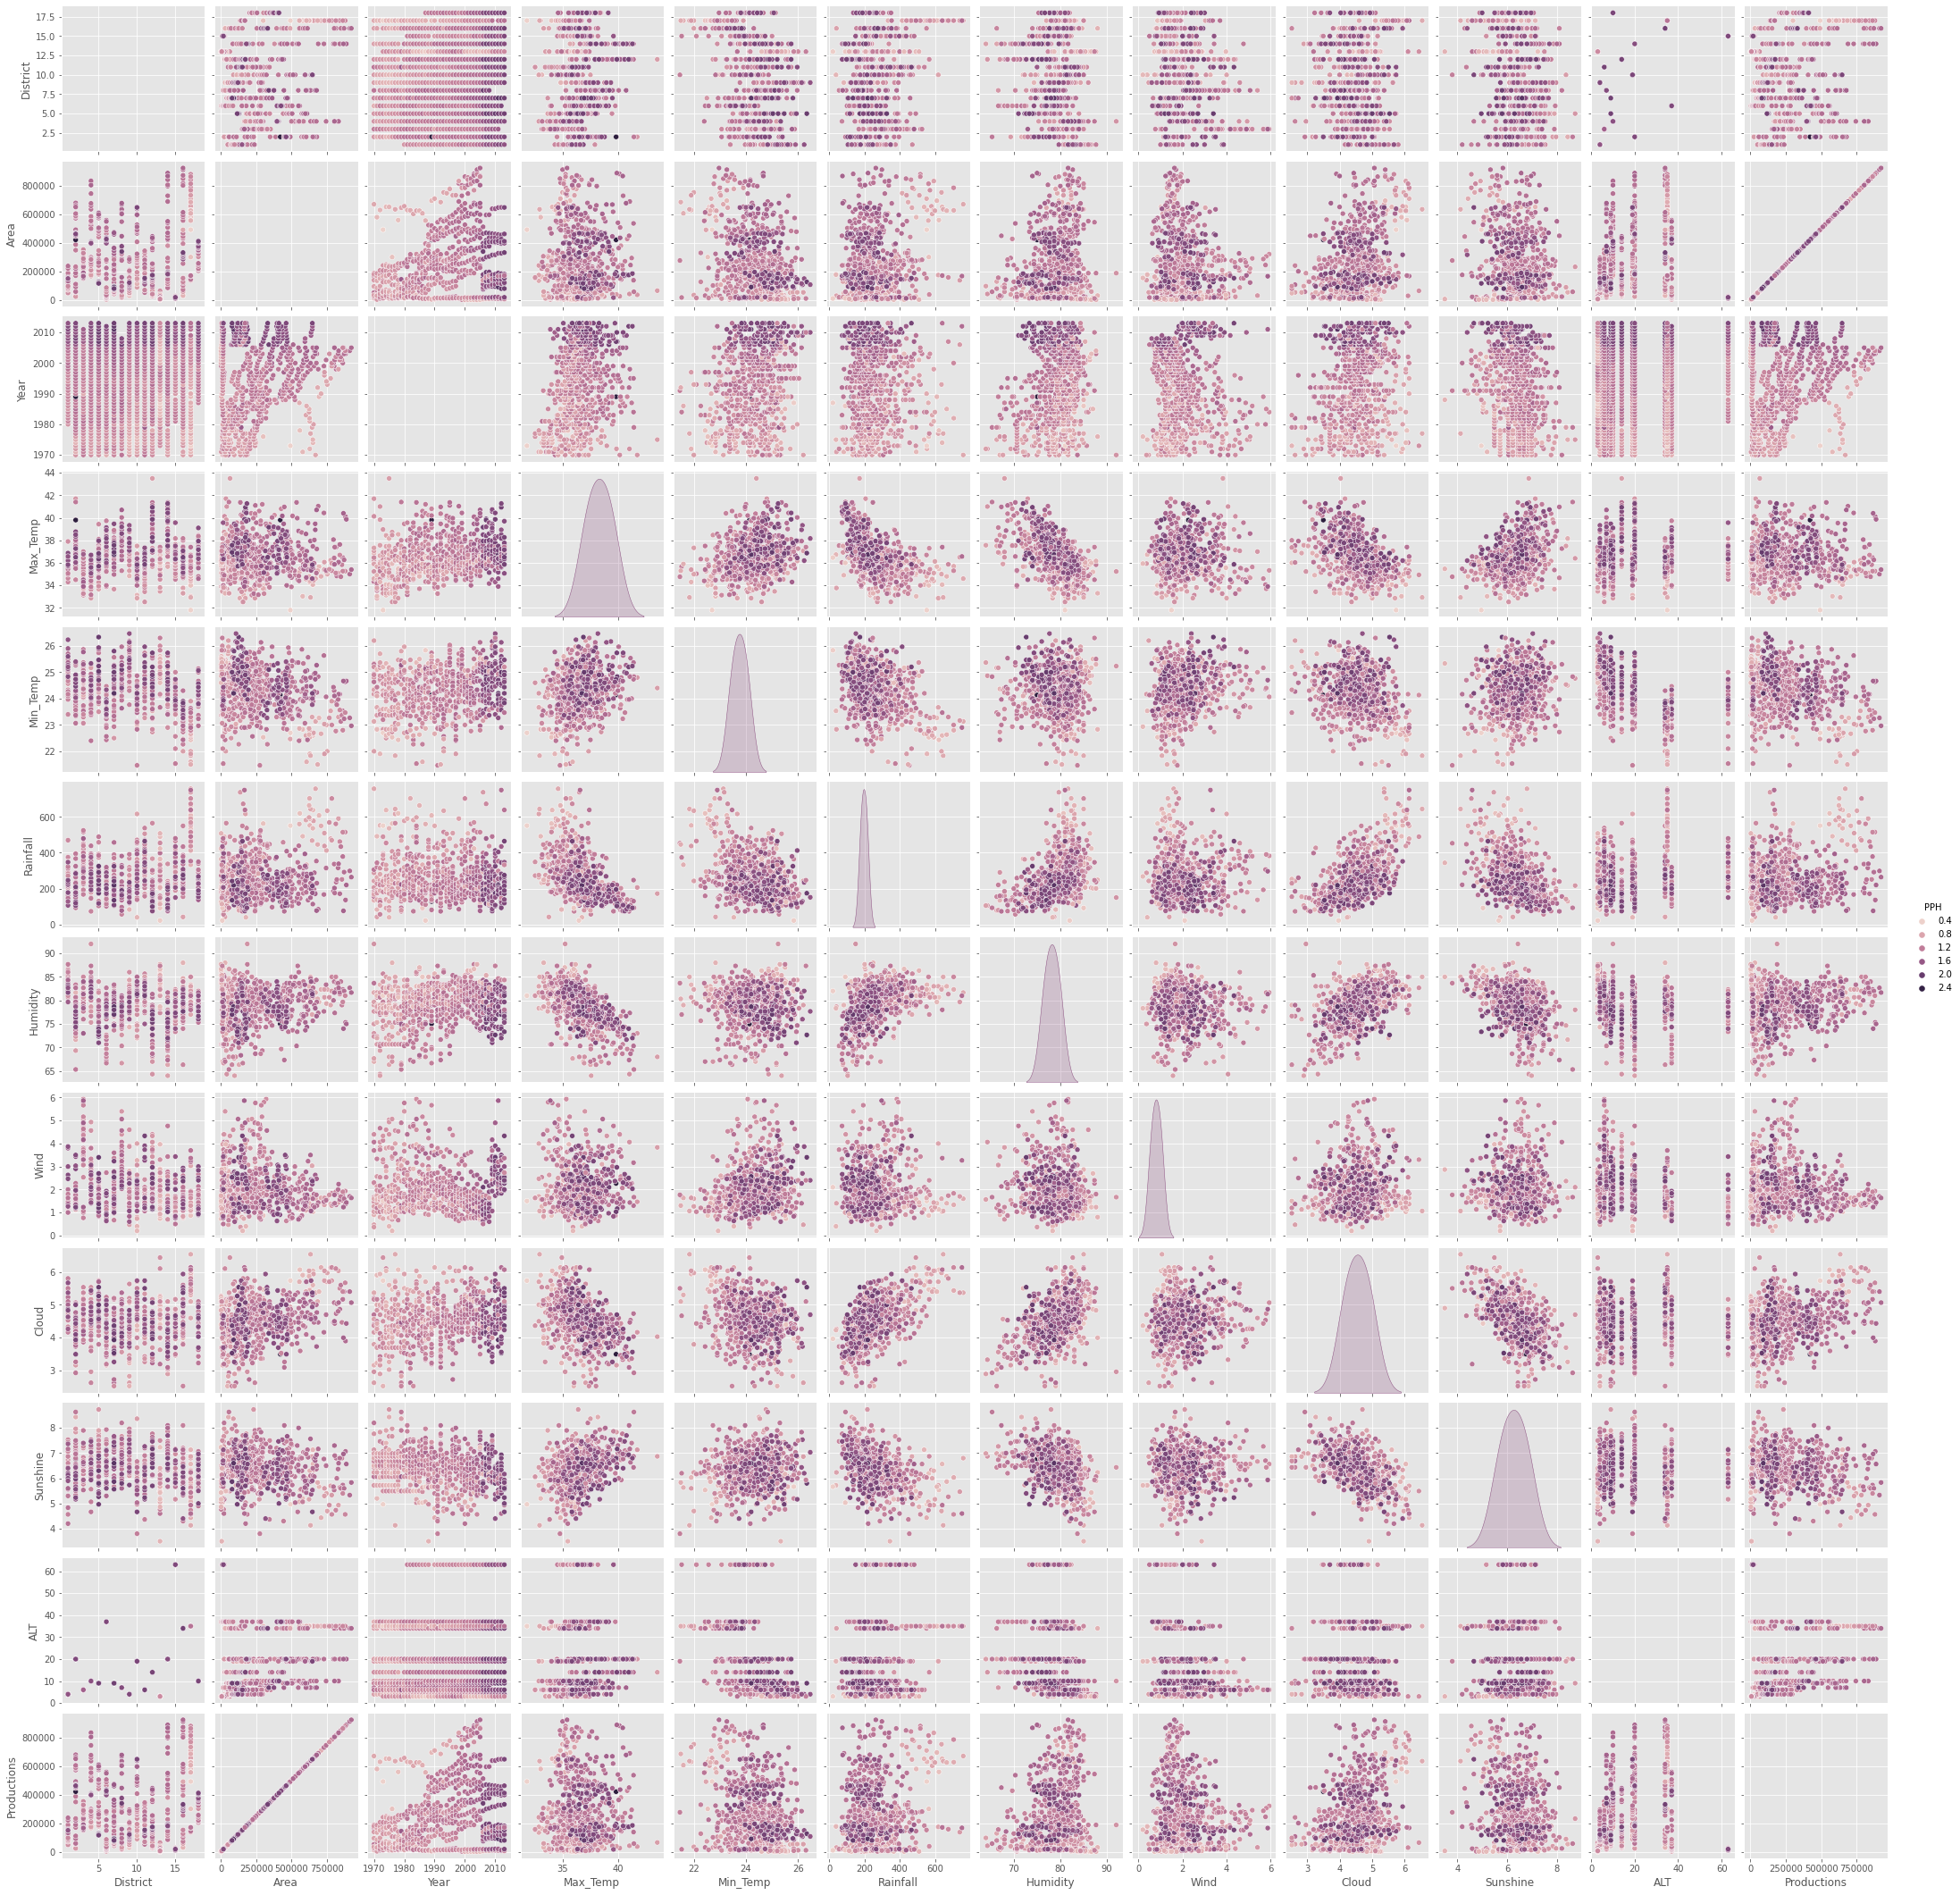

In [98]:
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue='PPH');

In [99]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "Rainfall", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [100]:
pio.templates.default = "seaborn"
plt.figure(figsize=(10, 10))
fig = px.line(data, x = "Cloud", y = "Rainfall", color = "Cloud")
fig.show()

<Figure size 720x720 with 0 Axes>

In [101]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Humidity", y = "Rainfall", color = "Humidity")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [102]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "PPH", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>